# Laboratory exercise 3

## Imports

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..") # Adds higher directory to python modules path.
import pdffuns

## Load Data

In [2]:
pfile='data/lab3.p'
with open(pfile, "rb") as fp:
     sample=pickle.load(fp)

In [3]:
sample[0]

array([[2.8, 2. , 2.8, 3. ],
       [4.8, 5.8, 6.9, 5.8]])

## Priors

In [4]:
p1 = 0.5
p2 = 0.5

## Estimate the means

In [5]:
mu1 = np.mean(sample[0], axis=1)
mu2 = np.mean(sample[1], axis=1)

## Estimate the covariances

In [6]:
sigma1 = np.cov(sample[0])
sigma2 = np.cov(sample[1])

## Calculate distributions and plot decision boundary

Text(0.5, 0.92, 'Bivariate Gaussians estimated by MLE')

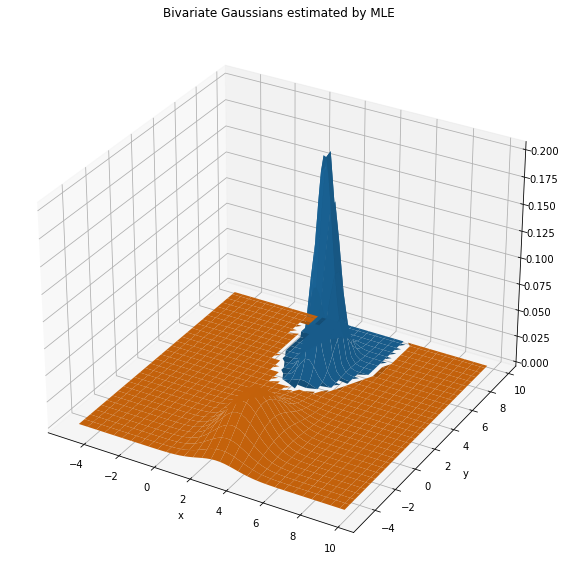

In [7]:
points = 60

# Create meshgrid
x1 = np.arange(-5,10, (15/points)).reshape(-1,1)
x2 = np.arange(-5,10, (15/points)).reshape(-1,1)
X, Y = np.meshgrid(x1, x2)

# Calculate distributions
compo1, Z1 = pdffuns.norm2D(mu1, sigma1, X, Y)
compo2, Z2 = pdffuns.norm2D(mu2, sigma2, X, Y)

# Remove posterior probability values according to bayes classification rule.
Z1[Z1 < Z2] = np.nan
Z2[Z2 <= Z1] = np.nan

# Display figure
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X,Y,p1*Z1, facecolor='red')
ax.plot_surface(X,Y,p2*Z2, facecolor='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Bivariate Gaussians estimated by MLE")

## Parzen Classifier with window size $h_1 = 0.5$

Text(0.5, 0.92, 'Distribution estimated by Parzen-window with $h_1 = 0.5$')

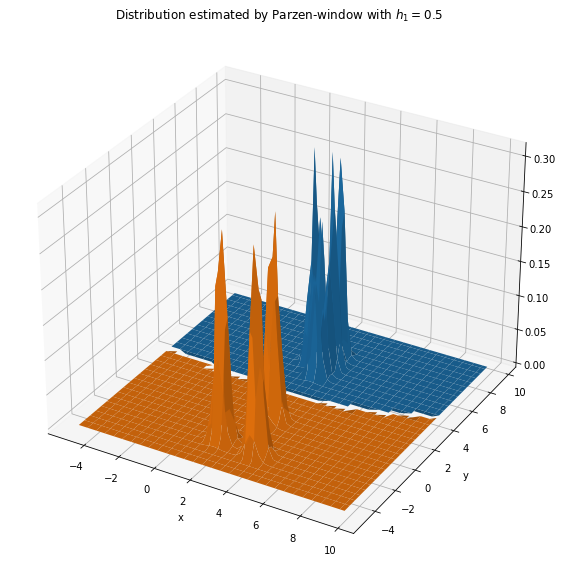

In [8]:
classifier1, Z1 = pdffuns.parzen(sample[0], 0.5, X, Y)
classifier2, Z2 = pdffuns.parzen(sample[1], 0.5, X, Y)

# Find probability of observation
px = classifier1 + classifier2

# Calculat posteriors
posterior1 = np.divide(classifier1, px)
posterior2 = np.divide(classifier2, px)

# Remove densitiy values according to bayes classification rule.
Z1[Z1 < Z2] = np.nan
Z2[Z2 <= Z1] = np.nan

# Remove scaled densitiy values according to bayes classification rule.
classifier1[classifier1 < classifier2] = np.nan
classifier2[classifier2 <= classifier1] = np.nan

classifier1 = classifier1*p1
classifier2 = classifier2*p2

# Display figure
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X,Y, classifier1, facecolor='red')
ax.plot_surface(X,Y, classifier2, facecolor='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Distribution estimated by Parzen-window with $h_1 = 0.5$")

In [10]:
classifier1

array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       ...,
       [8.05179399e-213, 7.06302766e-201, 2.27926424e-189, ...,
        5.94060190e-165, 2.24846212e-176, 3.13073436e-188],
       [4.95999871e-219, 4.35090715e-207, 1.40405327e-195, ...,
        2.98067812e-169, 1.12815872e-180, 1.57083601e-192],
       [1.12402505e-225, 9.85993932e-214, 3.18183762e-202, ...,
        5.50180541e-174, 2.08238177e-185, 2.89948587e-197]])

Text(0.5, 0.92, 'Posterior estimated by Parzen-window with $h_1 = 0.5$')

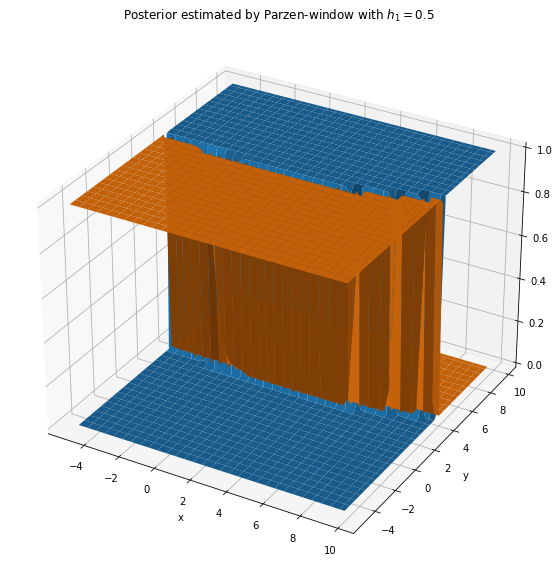

In [8]:
# Display figure
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X,Y, posterior1, facecolor='red')
ax.plot_surface(X,Y, posterior2, facecolor='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Posterior estimated by Parzen-window with $h_1 = 0.5$")

## And with $h_1 = 5$

Text(0.5, 0.92, 'Distribution estimated by Parzen-window with $h_1 = 5$')

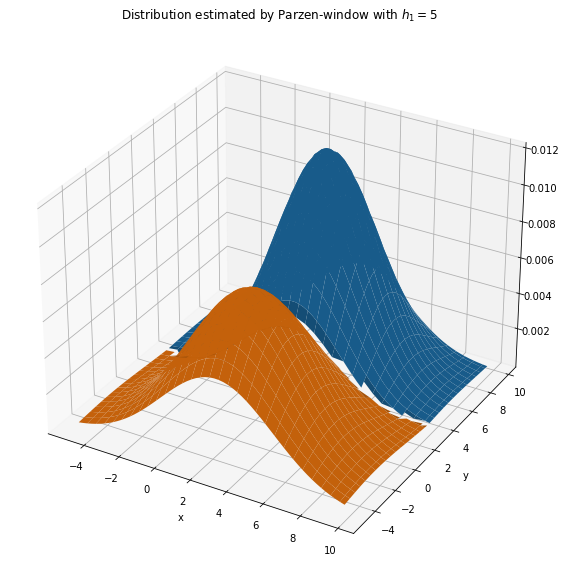

In [9]:
classifier1, Z1 = pdffuns.parzen(sample[0], 5, X, Y)
classifier2, Z2 = pdffuns.parzen(sample[1], 5, X, Y)

# Find probability of observation
px = classifier1 + classifier2

# Calculat posteriors
posterior1 = np.divide(classifier1, px)
posterior2 = np.divide(classifier2, px)

# Remove densitiy values according to bayes classification rule.
Z1[Z1 < Z2] = np.nan
Z2[Z2 <= Z1] = np.nan

# Remove scaled densitiy values according to bayes classification rule.
classifier1[classifier1 < classifier2] = np.nan
classifier2[classifier2 <= classifier1] = np.nan

classifier1 = classifier1*p1
classifier2 = classifier2*p2

# Display figure
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X,Y, classifier1, facecolor='red')
ax.plot_surface(X,Y, classifier2, facecolor='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Distribution estimated by Parzen-window with $h_1 = 5$")

Text(0.5, 0.92, 'Posterior estimated by Parzen-window with $h_1 = 5$')

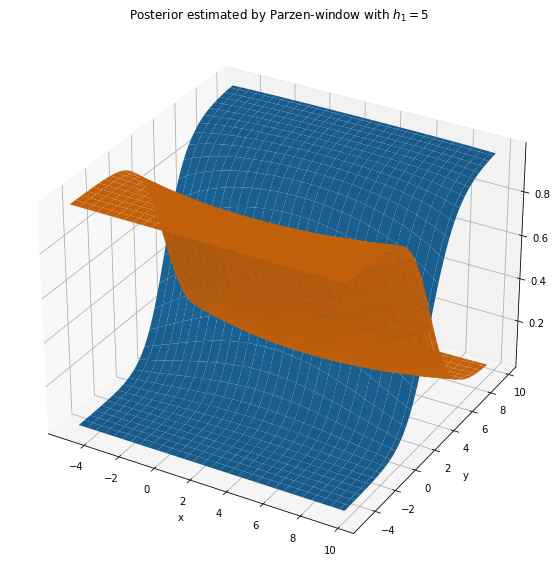

In [10]:
# Display figure
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X,Y, posterior1, facecolor='red')
ax.plot_surface(X,Y, posterior2, facecolor='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Posterior estimated by Parzen-window with $h_1 = 5$")

## $K_n$ Nearest neighbors with $K_n = 1$

Text(0.5, 0.92, 'KNN estimated density')

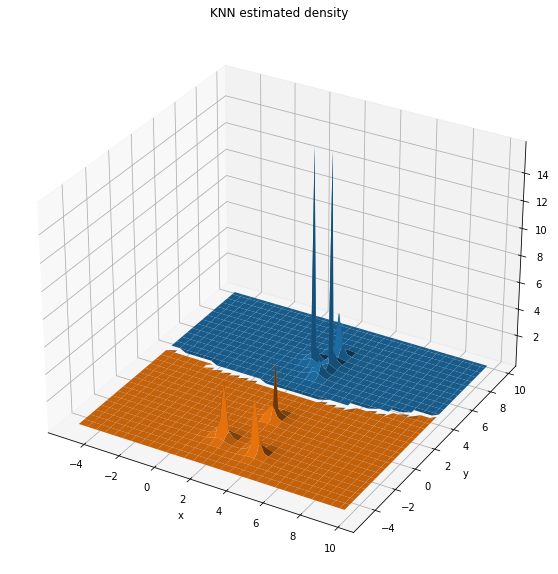

In [16]:
# Calculate distributions
Z1 = pdffuns.knn2D(sample[0], 1, X, Y)
Z2 = pdffuns.knn2D(sample[1], 1, X, Y)

# Calculate posteriors kernels
Z1 = Z1*p1
Z2 = Z2*p2
px = Z1 + Z2

# Remove posterior probability values according to bayes classification rule.
Z1[Z1 < Z2] = np.nan
Z2[Z2 <= Z1] = np.nan

# Display figure
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X,Y,Z1, facecolor='red')
ax.plot_surface(X,Y,Z2, facecolor='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("KNN estimated density")

Text(0.5, 0.92, 'Bivariate Gaussian for $\\omega_i$')

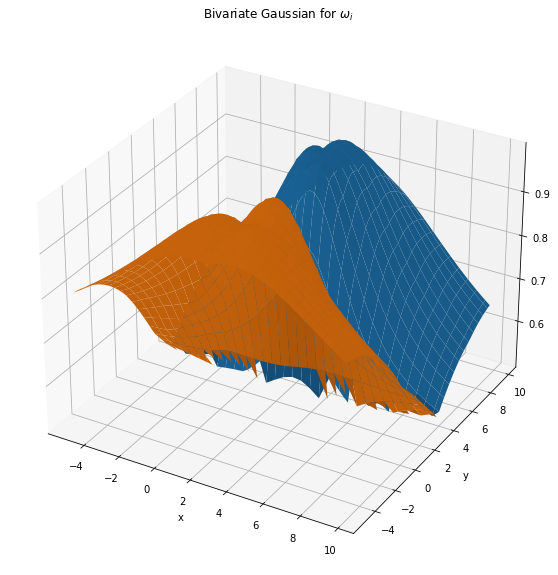

In [17]:
Z1 = np.divide(Z1, px)
Z2 = np.divide(Z2, px)

# Display figure
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X,Y,Z1, facecolor='red')
ax.plot_surface(X,Y,Z2, facecolor='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Bivariate Gaussian for $\omega_i$")

## $K_n$ Nearest neighbors with $K_n = 3$

Text(0.5, 0.92, 'KNN estimated density')

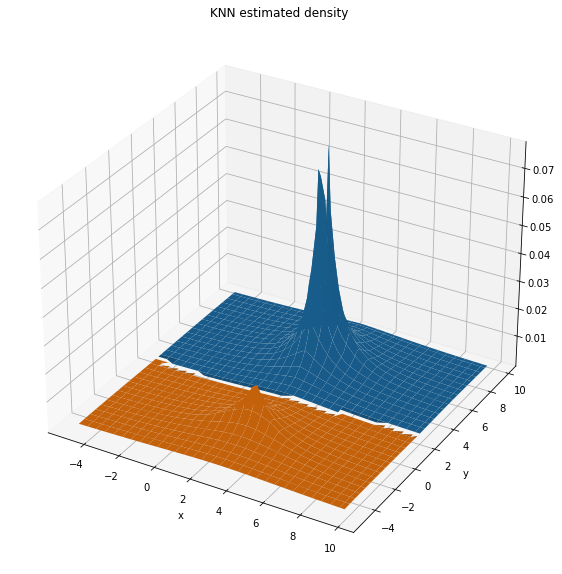

In [19]:
# Calculate distributions
Z1 = pdffuns.knn2D(sample[0], 3, X, Y)
Z2 = pdffuns.knn2D(sample[1], 3, X, Y)

# Calculate posteriors kernels
Z1 = Z1*p1
Z2 = Z2*p2
px = Z1 + Z2

# Remove posterior probability values according to bayes classification rule.
Z1[Z1 < Z2] = np.nan
Z2[Z2 <= Z1] = np.nan

# Display figure
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X,Y,Z1, facecolor='red')
ax.plot_surface(X,Y,Z2, facecolor='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("KNN estimated density")

Text(0.5, 0.92, 'Bivariate Gaussian for $\\omega_i$')

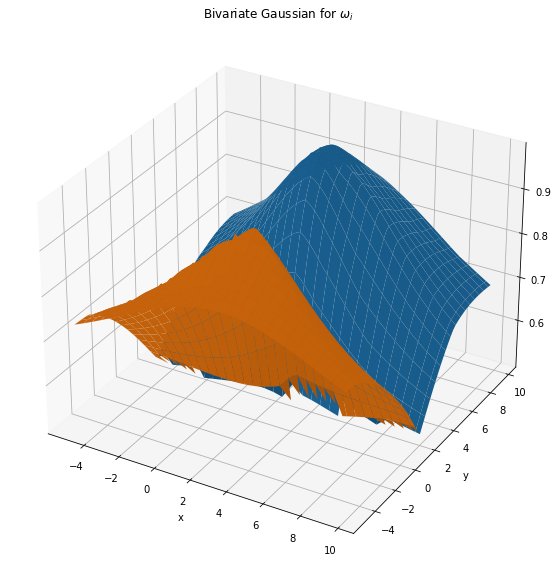

In [20]:
Z1 = np.divide(Z1, px)
Z2 = np.divide(Z2, px)

# Display figure
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X,Y,Z1, facecolor='red')
ax.plot_surface(X,Y,Z2, facecolor='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Bivariate Gaussian for $\omega_i$")

## $K_n$ Nearest neighbors with $K_n = 3$

This is not possible due to the fact that the dataset dont have more than 3 or 4 samples and it is therefore
impossible to find 5 neighbours.